# Effect of Age Married on Income
## By: Mitchell Pudil
## For Assistantship with Dr. Joseph Price at BYU
## Languages: R and Stata (only R part shown here)

In [1]:
marriage <- read.csv("agemarried.csv")

Currently, the birthbeforemarriage feature is a 0 if there was a birth before marriage and a 1 otherwise, so we will need to flip those. 

In [ ]:
marriage$birthbeforemarriage <- as.numeric(1-marriage$birthbeforemarriage)

### Correlations

In [2]:
#Correlations
marriage$lnincome <- log(marriage$rincome + 0.001) #Since log(0) is undefined
cor(marriage$lnincome, marriage$agemarried)

[1] 0.04235257

### Scatter plots of data

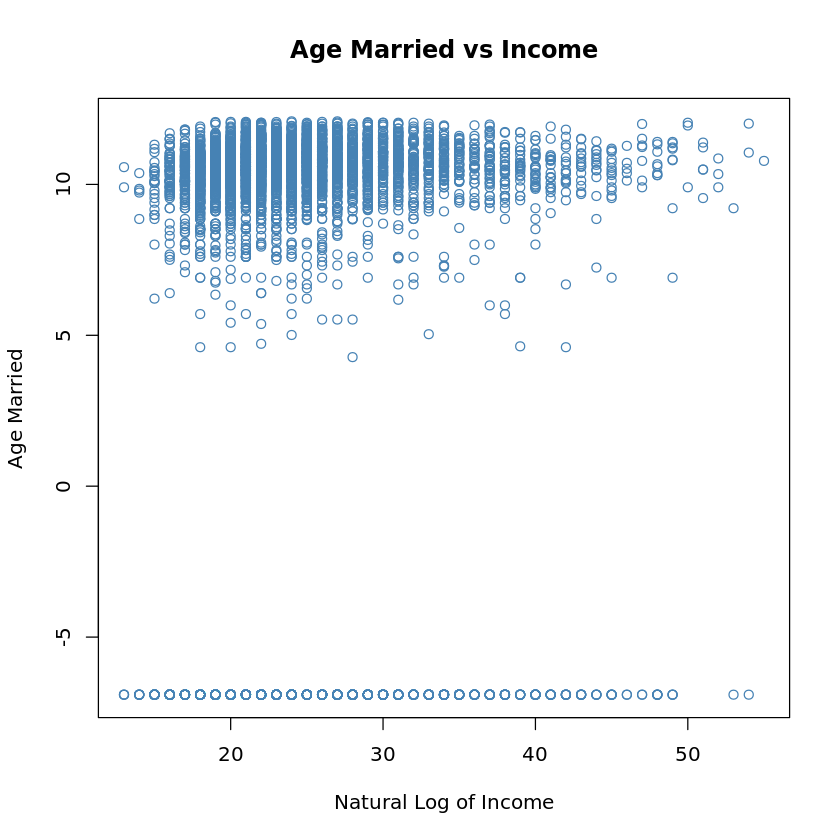

In [6]:
#Marriage vs income
plot(marriage$agemarried, marriage$lnincome, xlab="Natural Log of Income", ylab="Age Married", col="steel blue", main = "Age Married vs Income")

### Initial Regression

In [7]:
summary(lm(lnincome ~ agemarried + I(agemarried^2), data=marriage))


Call:
lm(formula = lnincome ~ agemarried + I(agemarried^2), data = marriage)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.333   1.496   3.659   4.432  10.649 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -3.454506   1.266819  -2.727  0.00641 ** 
agemarried       0.703699   0.091552   7.686 1.77e-14 ***
I(agemarried^2) -0.011379   0.001568  -7.257 4.49e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.31 on 5648 degrees of freedom
Multiple R-squared:  0.01102,	Adjusted R-squared:  0.01067 
F-statistic: 31.45 on 2 and 5648 DF,  p-value: 2.601e-14


So age married and age married squared appear to have significant relationship with log of income. 

According to theory, there is a logged relationship between education and income. Let's see if that is the case here. This will help us with the validity of our dataset, if nothing else.


Call:
lm(formula = lnincome ~ reducation, data = marriage)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.797   1.347   3.577   4.500   7.137 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.14365    0.52338   4.096 4.27e-05 ***
reducation   0.42158    0.04972   8.478  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.298 on 5582 degrees of freedom
  (67 observations deleted due to missingness)
Multiple R-squared:  0.01271,	Adjusted R-squared:  0.01254 
F-statistic: 71.88 on 1 and 5582 DF,  p-value: < 2.2e-16


ERROR: Error in eval(expr, envir, enclos): object '.' not found


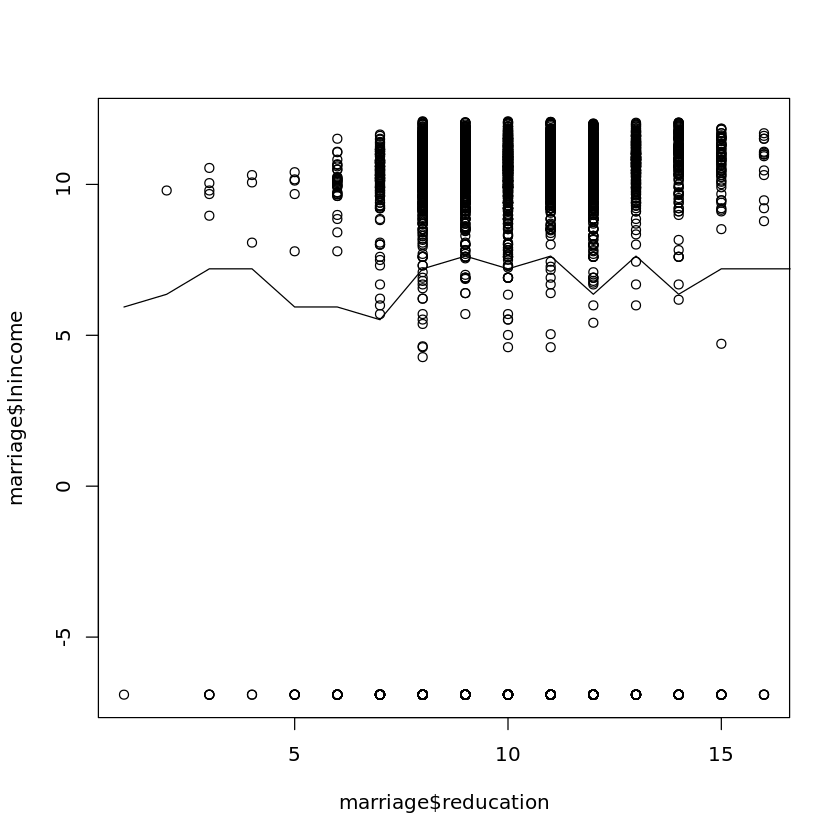

In [8]:
plot(marriage$reducation, marriage$lnincome)


In [10]:
out.education <- lm(lnincome ~ reducation, data=marriage)
summary(out.education) 
lines(predict(out.education))


Call:
lm(formula = lnincome ~ reducation, data = marriage)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.797   1.347   3.577   4.500   7.137 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.14365    0.52338   4.096 4.27e-05 ***
reducation   0.42158    0.04972   8.478  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.298 on 5582 degrees of freedom
  (67 observations deleted due to missingness)
Multiple R-squared:  0.01271,	Adjusted R-squared:  0.01254 
F-statistic: 71.88 on 1 and 5582 DF,  p-value: < 2.2e-16


ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


So we confirm that there is a significant relationship between education and lnincome (p<0.001)

Interpretation: a one year increase in education has an expected return of about 6% increase in income


Mother's education and father's education should follow a similar, but even more attenuated 
line (i.e. we should still have a logged effect, but it should be a little bit less impactful
than the effect of personal education on personal income)



Call:
lm(formula = lnincome ~ meducation, data = marriage)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.957   1.510   3.572   4.294   8.020 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.75536    0.34539  10.873   <2e-16 ***
meducation   0.26468    0.03071   8.619   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.234 on 5318 degrees of freedom
  (331 observations deleted due to missingness)
Multiple R-squared:  0.01378,	Adjusted R-squared:  0.01359 
F-statistic: 74.29 on 1 and 5318 DF,  p-value: < 2.2e-16


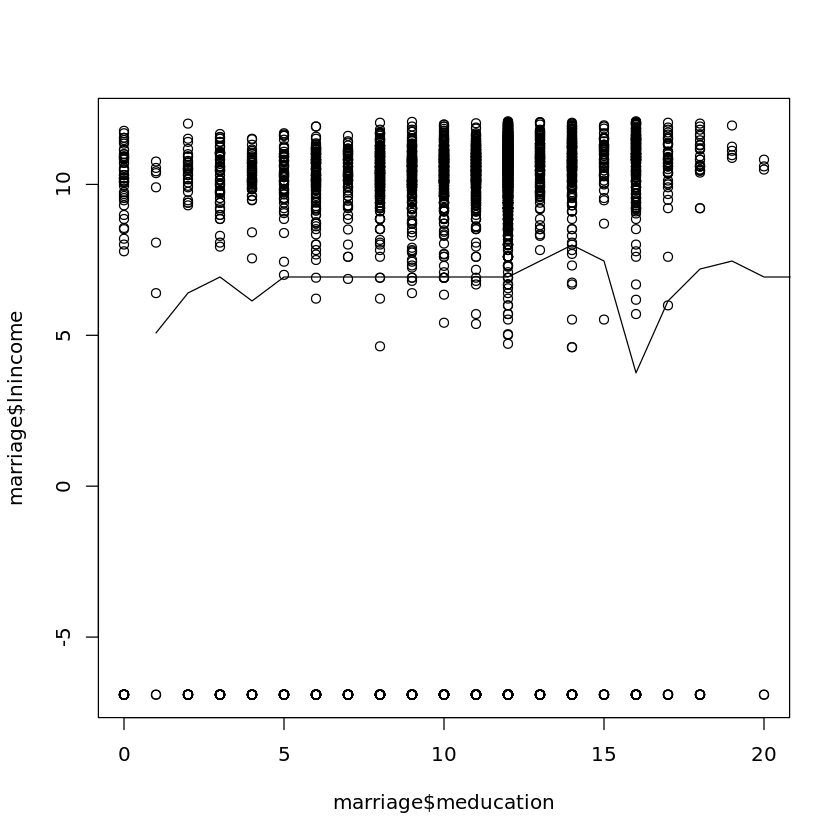


Call:
lm(formula = lnincome ~ feducation, data = marriage)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.694   1.496   3.472   4.221   7.746 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.29730    0.29968   14.34   <2e-16 ***
feducation   0.22447    0.02592    8.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.16 on 4893 degrees of freedom
  (756 observations deleted due to missingness)
Multiple R-squared:  0.0151,	Adjusted R-squared:  0.0149 
F-statistic:    75 on 1 and 4893 DF,  p-value: < 2.2e-16


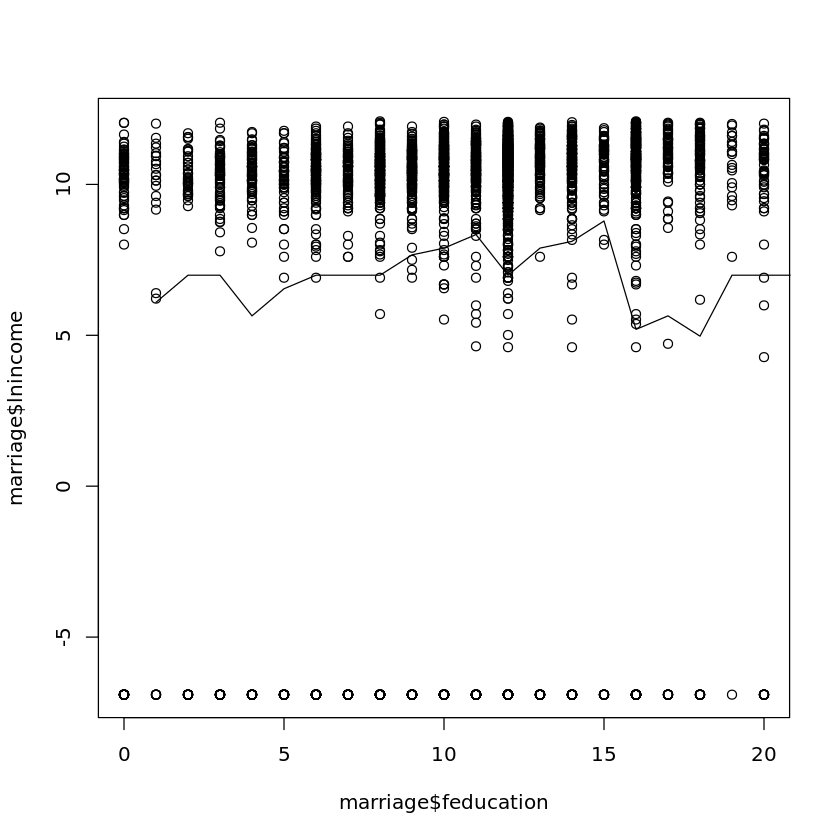

In [9]:
plot(marriage$meducation, marriage$lnincome) # Mother's Education
out.meducation <- lm(lnincome ~ meducation, data=marriage)
summary(out.meducation) 
lines(predict(out.meducation))

plot(marriage$feducation, marriage$lnincome) # Father's Education
out.feducation <- lm(lnincome ~ feducation, data=marriage)
summary(out.feducation) 
lines(predict(out.feducation))

So we confirm that mother's education and father's education do indeed affect income at a more 
attenuated rate that is still statistically significant

### Combined Preliminary Regression

In [11]:
out.marriage <- lm(lnincome ~ agemarried + I(agemarried^2) + rfirstbirth + male + reducation + meducation + feducation + factor(ethnicity) + rhealth + famsize + factor(region) + rurban, data=marriage)                        
summary(out.marriage)


Call:
lm(formula = lnincome ~ agemarried + I(agemarried^2) + rfirstbirth + 
    male + reducation + meducation + feducation + factor(ethnicity) + 
    rhealth + famsize + factor(region) + rurban, data = marriage)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.3249   0.1907   1.5787   2.5651  13.4440 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          3.050387   1.886714   1.617 0.106040    
agemarried                           0.133652   0.136239   0.981 0.326671    
I(agemarried^2)                     -0.003054   0.002309  -1.323 0.186025    
rfirstbirth                          0.022535   0.025248   0.893 0.372167    
male                                 1.460471   0.234846   6.219 5.76e-10 ***
reducation                           0.220261   0.059680   3.691 0.000228 ***
meducation                           0.015221   0.049079   0.310 0.756480    
feducation                           0.0715

### Check residuals to ensure mean 0 and appx normality

[1] 4.903507e-17

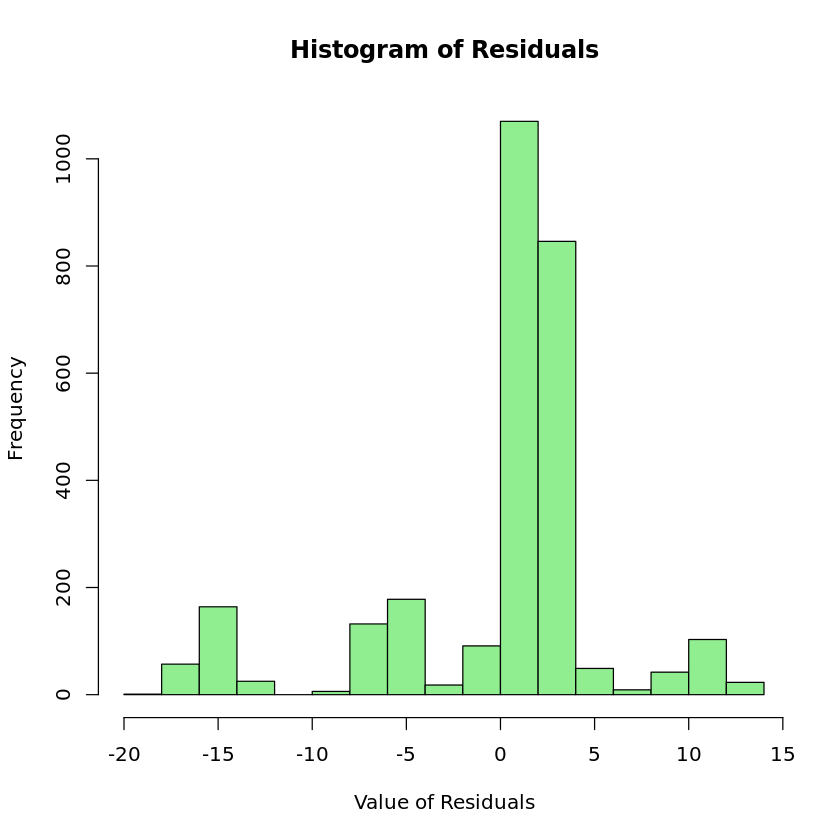

In [14]:
hist(resid(out.marriage), main = 'Histogram of Residuals', xlab = 'Value of Residuals', col="light green")
mean(resid(out.marriage))


It appears that the error terms have a mean of 0, and it is not clear if the error terms are normally distributed. Let's use the KS test to determine if the error terms are normally distributed.


	One-sample Kolmogorov-Smirnov test

data:  R.marriage
D = 0.26381, p-value < 2.2e-16
alternative hypothesis: two-sided


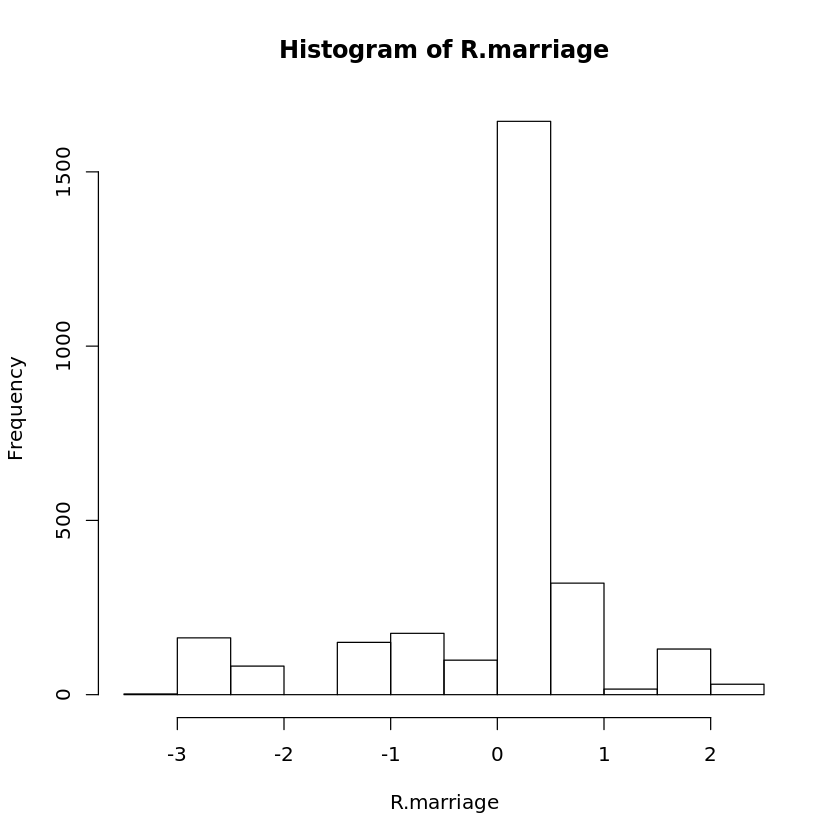

In [15]:
R.marriage <- rstudent(out.marriage)
hist(R.marriage)
ks.test(R.marriage, "pnorm")

We reject the null hypothesis of normality in our error terms

### Leverage points and outliers

In [32]:
leverage.marriage <- lm.influence(out.marriage)$hat
#leverage.marriage <- subset(leverage.marriage,marriage$id=="2894")
leverage.sorted <- sort(leverage.marriage, decreasing = T)
leverage.most <- leverage.sorted[1:20]
leverage.most

4341        927       4436       4985       4772       1935       3917 
0.06726053 0.06630797 0.03918124 0.03815795 0.03192106 0.03114173 0.03105065 
      4572       4261       2305       4733       3161       2121       1097 
0.02951332 0.02869622 0.02755130 0.02637930 0.02544869 0.02329766 0.02294105 
      2755       3626        203       4267       4541       5097 
0.02283561 0.02209705 0.02200748 0.02163071 0.02148817 0.02089714

In [35]:
marriage <- marriage[-c(4341, 927, 4436)]

We appear to have an unusually large number of respondants with an income of exactly 343,830 USD.
There appears to be a square relationship between age married and income. 

In [36]:
marriage2 <- subset(marriage, rincome!=343830)
marriage3 <- marriage2[!is.na(marriage2$agemarried),] # only contains data with people who are or 
# have been married

Determine if there is collinearity with our model

In [41]:
out.marriage3 <- lm(lnincome ~ agemarried + I(agemarried^2) + rfirstbirth + male + reducation + meducation + feducation + factor(ethnicity) + rhealth + famsize + factor(region) + rurban, data=marriage3)                        

In [ ]:
marriage3.numeric <- marriage3[,c(1,3,4,5,8,12,14,18)]

In [56]:
na.omit(marriage3)

,rincome,male,reducation,meducation,feducation,ethnicity,rhealth,famsize,region,rmarried,⋯,agemarried,evermarried,birthbeforemarriage,maleagemarried,agemarriedsq,lnicome,lnincome,ethnicgroup,regiongroup,difference
1,19000,0,9,5,8,Not_Black_Hispanic,0,3,Northeast,1,⋯,33,1,1,0,1089,9.852194,9.852194,3,2,1
2,35000,0,10,10,12,Not_Black_Hispanic,0,2,West,1,⋯,19,1,1,0,361,10.463100,10.463103,3,4,0
3,105000,1,12,12,12,Not_Black_Hispanic,0,5,North Central,1,⋯,28,1,1,28,784,11.561720,11.561716,3,1,2
4,40000,0,12,9,6,Not_Black_Hispanic,0,3,Northeast,1,⋯,17,1,1,0,289,10.596630,10.596635,3,2,0
5,75000,1,9,12,10,Not_Black_Hispanic,0,3,Northeast,1,⋯,25,1,1,25,625,11.225240,11.225243,3,2,2
8,70000,0,12,12,12,Not_Black_Hispanic,0,4,Northeast,0,⋯,29,1,1,0,841,11.156250,11.156251,3,2,2
10,150000,1,12,12,16,Not_Black_Hispanic,0,1,West,0,⋯,21,1,0,21,441,11.918390,11.918391,3,4,-2
11,115000,0,13,12,18,Not_Black_Hispanic,0,3,Northeast,1,⋯,28,1,1,0,784,11.652690,11.652687,3,2,2
15,16036,0,12,14,20,Not_Black_Hispanic,0,3,Northeast,0,⋯,24,1,1,0,576,9.682591,9.682592,3,2,3
18,42000,1,8,9,3,Black,0,3,West,1,⋯,20,1,1,20,400,10.645420,10.645425,1,4,5


In [57]:
library(reshape2)

cormat <- round(cor(marriage3.numeric),2)
melted_cormat <- melt(cormat)
head(melted_cormat)

Var1,Var2,value
rincome,rincome,1.00
reducation,rincome,NA
meducation,rincome,NA
feducation,rincome,NA
famsize,rincome,0.08
rfirstbirth,rincome,NA


,rincome,male,reducation,meducation,feducation,ethnicity,rhealth,famsize,region,rmarried,⋯,agemarried,evermarried,birthbeforemarriage,maleagemarried,agemarriedsq,lnicome,lnincome,ethnicgroup,regiongroup,difference
1,19000,0,9,5,8,Not_Black_Hispanic,0,3,Northeast,1,⋯,33,1,1,0,1089,9.852194,9.852194,3,2,1
6,102000,0,9,12,12,Not_Black_Hispanic,0,1,Northeast,0,⋯,26,1,1,0,676,11.532730,11.532728,3,2,NA
16,5200,0,12,0,4,Not_Black_Hispanic,NA,2,Northeast,1,⋯,35,1,1,0,1225,8.556414,8.556414,3,2,NA
27,0,0,11,10,9,Not_Black_Hispanic,1,4,Northeast,0,⋯,35,1,0,0,1225,NA,-6.907755,3,2,-14
29,73000,0,14,12,12,Not_Black_Hispanic,1,3,Northeast,1,⋯,20,1,1,0,400,11.198210,11.198215,3,2,4
30,55000,0,9,9,10,Not_Black_Hispanic,0,4,Northeast,1,⋯,29,1,0,0,841,10.915090,10.915088,3,2,-3
33,45000,1,12,NA,NA,Not_Black_Hispanic,0,2,Northeast,1,⋯,26,1,1,26,676,10.714420,10.714418,3,2,NA
35,0,0,10,12,16,Not_Black_Hispanic,0,4,Northeast,1,⋯,22,1,1,0,484,NA,-6.907755,3,2,8
51,0,0,9,12,11,Not_Black_Hispanic,0,3,Northeast,1,⋯,27,1,1,0,729,NA,-6.907755,3,2,2
65,250,0,10,14,14,Not_Black_Hispanic,1,2,Northeast,0,⋯,26,1,1,0,676,5.521461,5.521465,3,2,1


,rincome,male,reducation,meducation,feducation,ethnicity,rhealth,famsize,region,rmarried,⋯,agemarried,evermarried,birthbeforemarriage,maleagemarried,agemarriedsq,lnicome,lnincome,ethnicgroup,regiongroup,difference
1,19000,0,9,5,8,Not_Black_Hispanic,0,3,Northeast,1,⋯,33,1,1,0,1089,9.852194,9.852194,3,2,1
6,102000,0,9,12,12,Not_Black_Hispanic,0,1,Northeast,0,⋯,26,1,1,0,676,11.532730,11.532728,3,2,NA
16,5200,0,12,0,4,Not_Black_Hispanic,NA,2,Northeast,1,⋯,35,1,1,0,1225,8.556414,8.556414,3,2,NA
27,0,0,11,10,9,Not_Black_Hispanic,1,4,Northeast,0,⋯,35,1,0,0,1225,NA,-6.907755,3,2,-14
29,73000,0,14,12,12,Not_Black_Hispanic,1,3,Northeast,1,⋯,20,1,1,0,400,11.198210,11.198215,3,2,4
30,55000,0,9,9,10,Not_Black_Hispanic,0,4,Northeast,1,⋯,29,1,0,0,841,10.915090,10.915088,3,2,-3
33,45000,1,12,NA,NA,Not_Black_Hispanic,0,2,Northeast,1,⋯,26,1,1,26,676,10.714420,10.714418,3,2,NA
35,0,0,10,12,16,Not_Black_Hispanic,0,4,Northeast,1,⋯,22,1,1,0,484,NA,-6.907755,3,2,8
51,0,0,9,12,11,Not_Black_Hispanic,0,3,Northeast,1,⋯,27,1,1,0,729,NA,-6.907755,3,2,2
65,250,0,10,14,14,Not_Black_Hispanic,1,2,Northeast,0,⋯,26,1,1,0,676,5.521461,5.521465,3,2,1


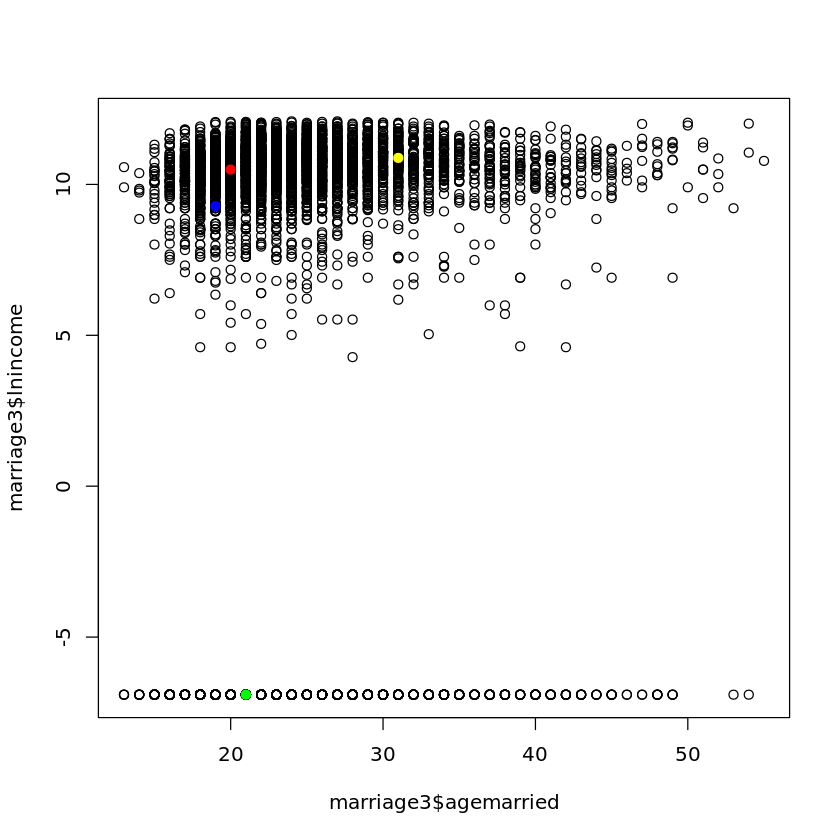


Call:
lm(formula = lnincome ~ agemarried + I(agemarried^2) + rfirstbirth + 
    male + reducation + meducation + feducation + factor(ethnicity) + 
    rhealth + famsize + factor(region) + rurban, data = marriage5)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.3265   0.1873   1.5806   2.5686  13.4489 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          3.045948   1.887436   1.614 0.106683    
agemarried                           0.133682   0.136290   0.981 0.326746    
I(agemarried^2)                     -0.003054   0.002310  -1.322 0.186128    
rfirstbirth                          0.022514   0.025257   0.891 0.372793    
male                                 1.461189   0.234965   6.219 5.76e-10 ***
reducation                           0.220190   0.059716   3.687 0.000231 ***
meducation                           0.014930   0.049112   0.304 0.761152    
feducation                           0.071


Call:
lm(formula = lnincome ~ agemarried + I(agemarried^2) + rfirstbirth + 
    birthbeforemarriage + male + reducation + meducation + feducation + 
    factor(ethnicity) + rhealth + famsize + factor(region) + 
    rurban, data = marriage5)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.4537   0.1052   1.5580   2.5711  13.3488 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          1.438543   1.974494   0.729 0.466330    
agemarried                           0.256290   0.143304   1.788 0.073814 .  
I(agemarried^2)                     -0.004318   0.002353  -1.835 0.066571 .  
rfirstbirth                         -0.028748   0.031413  -0.915 0.360188    
birthbeforemarriage                  1.119150   0.408642   2.739 0.006207 ** 
male                                 1.430417   0.234961   6.088  1.3e-09 ***
reducation                           0.205504   0.059887   3.432 0.000609 ***
meducation     


Call:
lm(formula = lnincome ~ agemarried + I(agemarried^2) + rfirstbirth + 
    birthbeforemarriage + reducation + meducation + feducation + 
    factor(ethnicity) + rhealth + famsize + factor(region) + 
    rurban, data = femaleonly)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.8193  -0.6894   2.0506   3.1015  13.2621 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          3.703757   2.737418   1.353   0.1763    
agemarried                           0.242547   0.200437   1.210   0.2264    
I(agemarried^2)                     -0.004216   0.003325  -1.268   0.2050    
rfirstbirth                         -0.005847   0.047770  -0.122   0.9026    
birthbeforemarriage                  0.861919   0.603602   1.428   0.1535    
reducation                           0.131943   0.088577   1.490   0.1365    
meducation                           0.040008   0.070680   0.566   0.5715    
feducation           


Call:
lm(formula = lnincome ~ agemarried + I(agemarried^2) + rfirstbirth + 
    birthbeforemarriage + reducation + meducation + feducation + 
    factor(ethnicity) + rhealth + famsize + factor(region) + 
    rurban, data = maleonly)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.122   0.032   1.062   1.909  13.699 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          0.813179   2.962927   0.274 0.783783    
agemarried                           0.226421   0.210812   1.074 0.283014    
I(agemarried^2)                     -0.003579   0.003418  -1.047 0.295172    
rfirstbirth                         -0.051840   0.040166  -1.291 0.197066    
birthbeforemarriage                  1.459194   0.535659   2.724 0.006538 ** 
reducation                           0.277184   0.078044   3.552 0.000397 ***
meducation                          -0.024817   0.066073  -0.376 0.707273    
feducation                       


Call:
lm(formula = lnincome ~ agemarried + I(agemarried^2) + rfirstbirth + 
    birthbeforemarriage + reducation + meducation + feducation + 
    factor(ethnicity) + rhealth + famsize + factor(region) + 
    rurban, data = marriage5)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7251   0.2137   1.6903   2.5381  13.5748 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          0.414636   1.979965   0.209  0.83414    
agemarried                           0.380083   0.142766   2.662  0.00781 ** 
I(agemarried^2)                     -0.006135   0.002349  -2.612  0.00905 ** 
rfirstbirth                         -0.019081   0.031574  -0.604  0.54569    
birthbeforemarriage                  1.238120   0.410799   3.014  0.00260 ** 
reducation                           0.169443   0.059977   2.825  0.00476 ** 
meducation                           0.020363   0.049364   0.413  0.68000    
feducation            

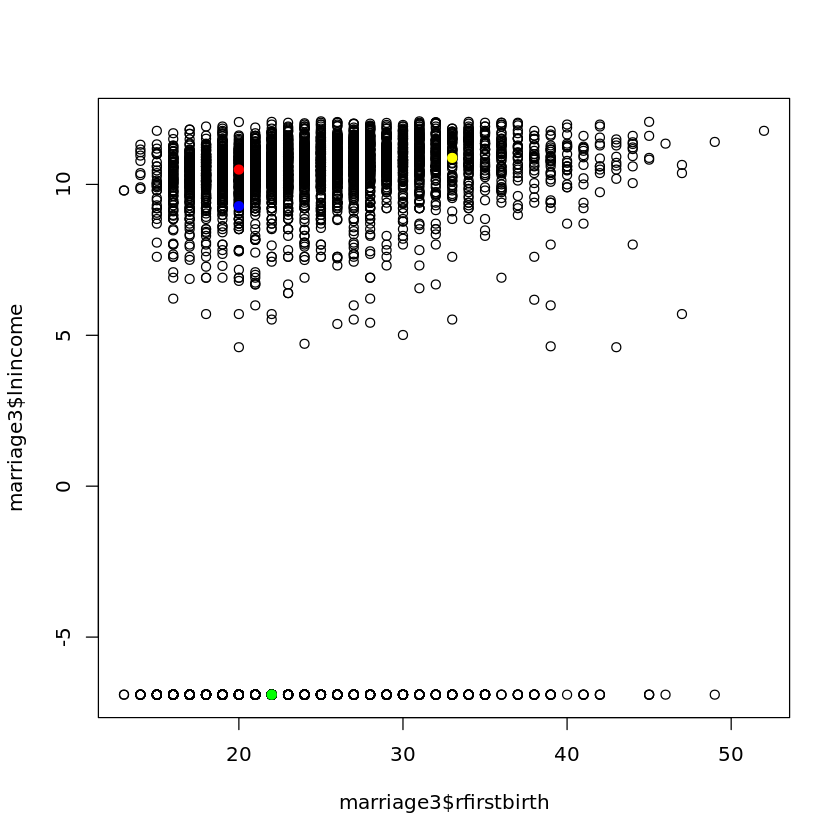

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Warning message:
“Removed 721 rows containing non-finite values (stat_smooth).”

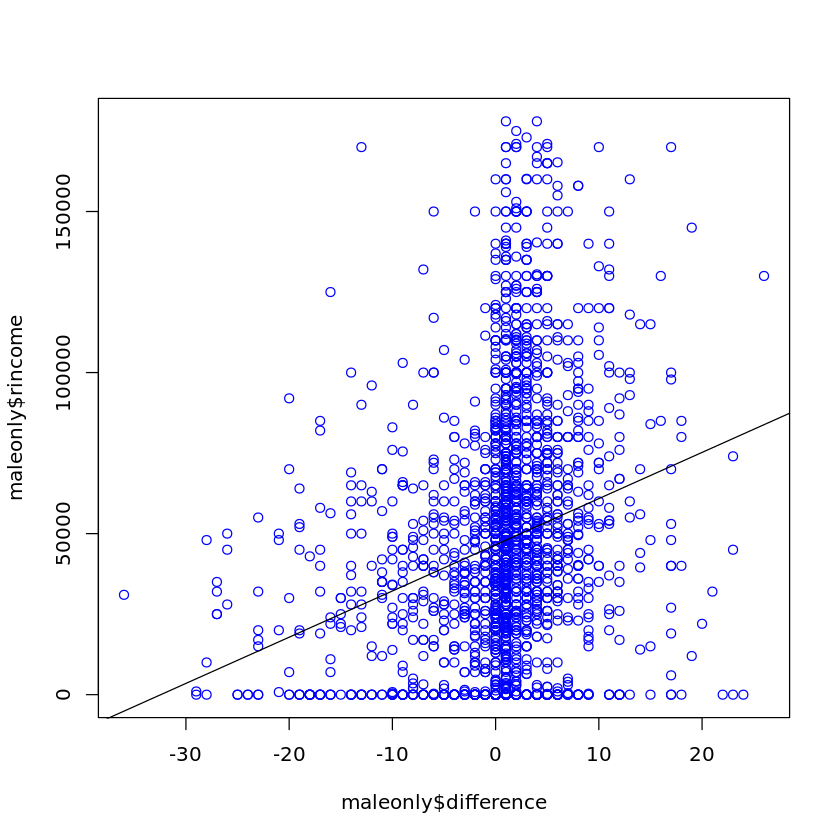

[1] 38218.28

[1] 37081.29

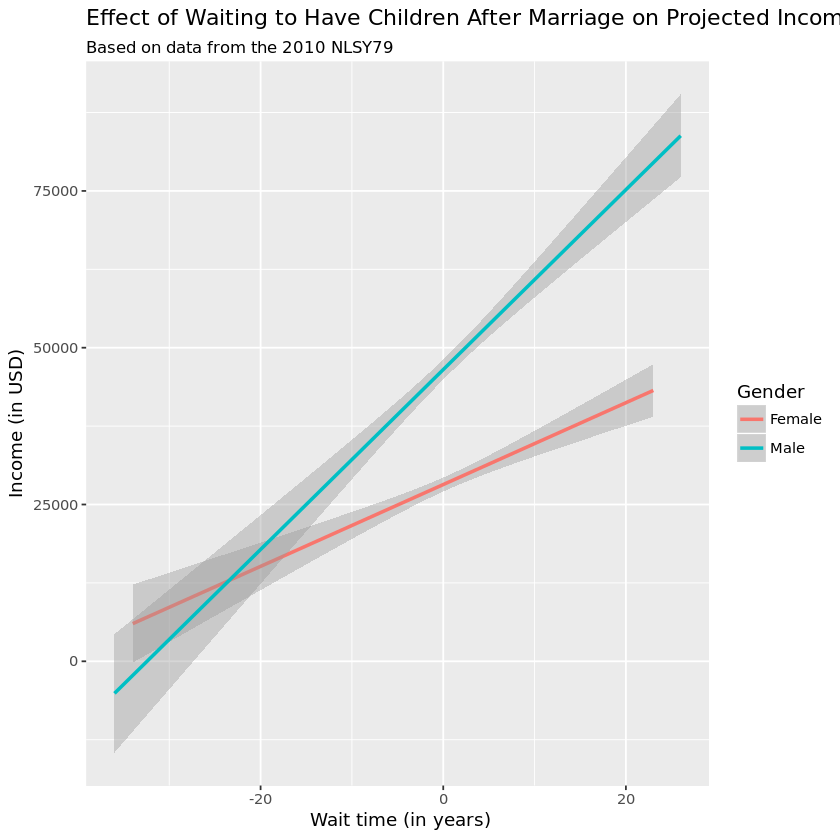

ERROR: Error in fortify(data): object 'visual1' not found


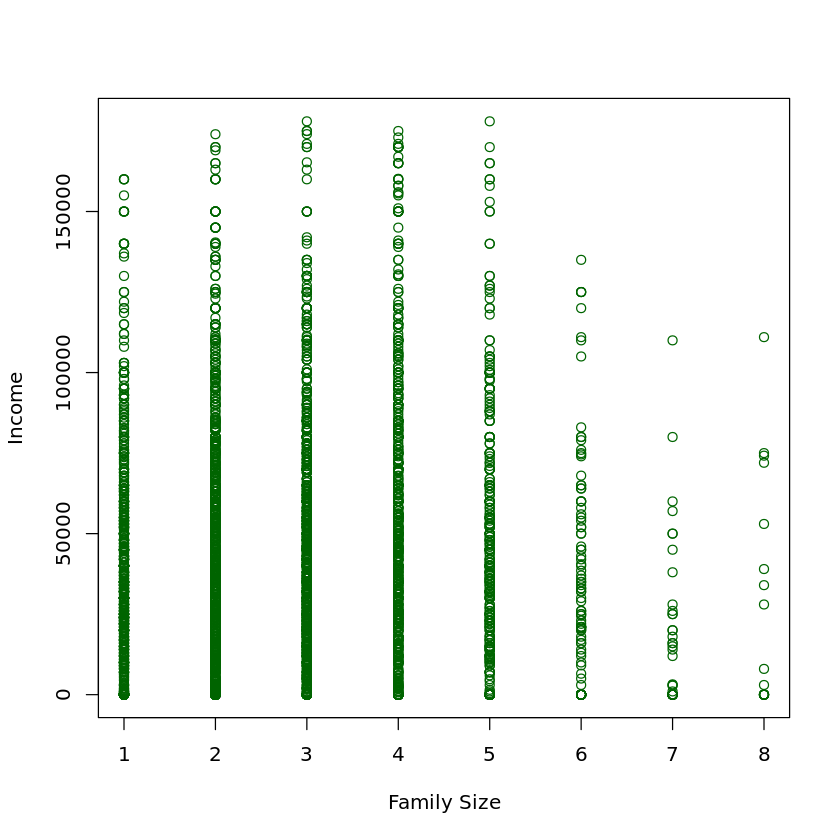

In [58]:

#Influential Observations
p <- 16
n <- 5651
lev <- (2*(p+1)/n)
leverage.marriage3 <- lm.influence(out.marriage3)$hat
influential <- subset(marriage3,leverage.marriage3 > lev)
influential
# We seem to have far too many "influential" observations to account for, so we will look only at the top 5 
# influential observations
rownames(marriage3) <- seq(length=nrow(marriage3))
most.influential <- subset(marriage3,leverage.marriage3 > lev)
most.influential

# Income vs age married
plot(marriage3$agemarried, marriage3$lnincome)
points(marriage3$agemarried[483], marriage3$lnincome[483], col="red", pch=19)
points(marriage3$agemarried[2154], marriage3$lnincome[2154], col="yellow", pch=19)
points(marriage3$agemarried[3297], marriage3$lnincome[3297], col="green", pch=19)
points(marriage3$agemarried[4968], marriage3$lnincome[4968], col="blue", pch=19)
par(mfrow=c(1,1))


# Income vs age first birth
plot(marriage3$rfirstbirth, marriage3$lnincome)
points(marriage3$rfirstbirth[483], marriage3$lnincome[483], col="red", pch=19)
points(marriage3$rfirstbirth[2154], marriage3$lnincome[2154], col="yellow", pch=19)
points(marriage3$rfirstbirth[3297], marriage3$lnincome[3297], col="green", pch=19)
points(marriage3$rfirstbirth[4968], marriage3$lnincome[4968], col="blue", pch=19)
par(mfrow=c(1,1))



marriage5 <- subset(marriage3,leverage.marriage3 <= lev*10)
out.marriage5 <- lm(lnincome ~ agemarried + I(agemarried^2) + rfirstbirth + male + 
                      reducation + meducation + feducation + factor(ethnicity) + rhealth + 
                      famsize + factor(region) + rurban, data=marriage5)                        
summary(out.marriage5)

# We are also interested in seeing if having a child before or after marriage results in higher income


out.marriage6 <- lm(lnincome ~ agemarried + I(agemarried^2) + rfirstbirth + birthbeforemarriage + male + 
                      reducation + meducation + feducation + factor(ethnicity) + rhealth + 
                      famsize + factor(region) + rurban, data=marriage5)                        
summary(out.marriage6)

# So having your first child before getting married decreases expected earnings by 112%. 

# We will check if this effect is different for different ages and for different genders. To do this, we will
# utlilize the Chow test by first splitting the data into different genders and testing for a difference, and 
# then splitting apart by age and seeing if that has a difference. 

# By gender
femaleonly <- subset(marriage5, male==0)
maleonly <- subset(marriage5, male==1)



out.female <- lm(lnincome ~ agemarried + I(agemarried^2) + rfirstbirth + birthbeforemarriage + 
                      reducation + meducation + feducation + factor(ethnicity) + rhealth + 
                      famsize + factor(region) + rurban, data=femaleonly)                        
summary(out.female)
ssr.female <- anova(out.female)[13,2]


out.male <- lm(lnincome ~ agemarried + I(agemarried^2) + rfirstbirth + birthbeforemarriage + 
                   reducation + meducation + feducation + factor(ethnicity) + rhealth + 
                   famsize + factor(region) + rurban, data=maleonly)                        
summary(out.male)
ssr.male <- anova(out.male)[13,2]


out.marriage7 <- lm(lnincome ~ agemarried + I(agemarried^2) + rfirstbirth + birthbeforemarriage + 
                      reducation + meducation + feducation + factor(ethnicity) + rhealth + 
                      famsize + factor(region) + rurban, data=marriage5)                        
summary(out.marriage7)


ssr.total <- anova(out.marriage7)[13,2]

k <- 15
N <- 5647

chow.num <- (ssr.total-(ssr.male+ssr.female))/(k-1)
chow.den <- (ssr.total/(N-2*k-2))
chow.stat <- chow.num/chow.den

# With an F critial value of 1.69 and a chow stat of 8.39, we conclude that our explanatory variables 
# different effects depending on gender.




# Men Plot for effect of waiting on income
out.malewaiting <- lm(rincome ~ difference +
                 reducation + meducation + feducation + rhealth + 
                 famsize + factor(ethnicity) + factor(region), data=maleonly)  

plot(maleonly$difference, maleonly$rincome, col="blue")
abline(lm(rincome ~ difference, data=maleonly))

install.packages("ggplot2")
library(ggplot2)

marriage$male <- as.factor(marriage$male)

marriage$Gender <- ifelse(marriage$male==1, "Male", "Female")

ggplot(marriage, aes(x=difference, y=rincome, color=Gender, shape=Gender, ylab="Income", xlab="Difference (Birth-Marriage)")) +
  geom_smooth(method=lm) +
  labs(x=" Wait time (in years)", y="Income (in USD)", title="Effect of Waiting to Have Children After Marriage on Projected Income",
       subtitle="Based on data from the 2010 NLSY79") 


nochildren <- subset(marriage, rhaschildren==0)
mean(nochildren$rincome)
children <- subset(marriage,rhaschildren==1)
mean(children$rincome)
# Mean differs by about $1000/yr

plot(marriage$famsize, marriage$rincome, xlim=c(1,8), xlab="Family Size", ylab="Income", col="dark green")






  ggplot() +
  # male (blue) plot
  geom_point(data=visual1, aes(x=ISSUE_DATE, y=COUNTED)) + 
  geom_smooth(data=visual1, aes(x=ISSUE_DATE, y=COUNTED), fill="blue",
              colour="darkblue", size=1) +
  # female ( plot
  geom_point(data=visual2, aes(x=ISSUE_DATE, y=COUNTED)) + 
  geom_smooth(data=visual2, aes(x=ISSUE_DATE, y=COUNTED), fill="red",
              colour="red", size=1)

aggregate(x=marriage$rincome, by=list(marriage$famsize), FUN=mean, data=marriage)
data.frame(aggregate(x=marriage$rincome, by=list(marriage$famsize), FUN=sd))

marriage$Family_Size <- NA
for(i in 1:length(marriage)) {
  if(marriage$famsize[i]<3) {
    marriage$Family_Size <- "Small"}
  if(marriage$famsize[i] == 3 | marriage$famsize[i] == 4 | marriage$famsize[i] == 5){
    marriage$Family_Size <- "Medium"}
  else{(marriage$Family_Size[i] <- "Large")}}

    

marriage$Timing <- ifelse(marriage$birthbeforemarriage==1, "Birth Before Marriage", "Birth After Marriage")
ggplot(marriage, aes(x=agemarried, y=rincome, color=Timing, shape=Timing, ylab="Income", xlab="Age Married")) +
  geom_smooth(method=lm) +
  labs(x="Age First Married", y="Income (in USD)", title="Effect of Age First Married on Income: By Timing of First Birth",
       subtitle="Based on data from the 2010 NLSY79") 

    

# Ln model

library(lmtest)
library(sandwich)
out.female <- lm(lnincome ~ agemarried + rfirstbirth + agemarried*birthbeforemarriage +
                 reducation + meducation + feducation + factor(ethnicity) + rhealth + 
                 famsize + factor(region) + rurban, data=femaleonly)  
coeftest(out.female, vcov = vcovHC(out.female, "HC1"))



maleonly$rfirstbirth




